In [ ]:
!pip3 install virtualenv

In [ ]:
!virtualenv theano

In [ ]:
!source /content/theano/bin/activate; pip3 install theano

In [ ]:
!source /content/theano/bin/activate; pip3 list

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
DATA_DIR = "/content/drive/MyDrive/Sign_language_final/"
MAIN_DIR = "/content/drive/MyDrive/Sign_language_final/SSD_Mobilenet_V2_640x640/"
MODEL_DIR = MAIN_DIR + "ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/"
CONFIG_FILE = MODEL_DIR + "pipeline.config"
CHECKPOINT_PATH = MODEL_DIR + "checkpoint/ckpt-0"

In [ ]:
!wget 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz'
!mv '/content/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz' {MAIN_DIR}
!cd {MAIN_DIR} && tar -zxvf ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz

# Download the object detection repo on github


In [ ]:
!cd {MAIN_DIR} && git clone https://github.com/tensorflow/models.git

In [ ]:
%%bash
cd /content/drive/MyDrive/Sign_language_final/SSD_Mobilenet_V2_640x640/models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

%matplotlib inline

In [ ]:
CUSTOM_MODEL_NAME = 'ssd_mobilenet_v2'

In [ ]:
!mkdir {MAIN_DIR+CUSTOM_MODEL_NAME}
!cp {CONFIG_FILE} {MAIN_DIR+CUSTOM_MODEL_NAME}

In [ ]:
#!pip freeze requirements.txt

In [ ]:
#!pip install tensorboard==1.11.0

In [ ]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2


In [ ]:
!pip install protobuf

In [ ]:
!pip install google-cloud
!pip install google

In [ ]:
!pip install tensorboard==1.12.2

In [ ]:
!pip show tensorboard

In [ ]:
CUSTOM_PIPELINE = MAIN_DIR+CUSTOM_MODEL_NAME+"/pipeline.config"

In [ ]:
CUSTOM_PIPELINE = MAIN_DIR+CUSTOM_MODEL_NAME+"/pipeline.config"
config = config_util.get_configs_from_pipeline_file(CUSTOM_PIPELINE)


In [ ]:
%cd /content/drive/MyDrive/constant
#!git clone --quiet https://github.com/tensorflow/models.git
!pip install tf_slim

!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk

!pip install -q Cython contextlib2 pillow lxml matplotlib

!pip install -q pycocotools

!pip install lvis

%cd /content/drive/MyDrive/constant/models/research
!protoc object_detection/protos/*.proto --python_out=.
#sys.path.append(os.environ["models/research"])

import os
os.environ['PYTHONPATH'] += ':/content/drive/MyDrive/constant/models/research/:/content/drive/MyDrive/constant/models/research/slim/'

!python object_detection/builders/model_builder_test.py

In [ ]:
from google.protobuf import text_format

In [ ]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(CUSTOM_PIPELINE, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)

In [ ]:
pipeline_config.model.ssd.num_classes = 26
pipeline_config.train_config.batch_size = 10
pipeline_config.train_config.fine_tune_checkpoint = CHECKPOINT_PATH
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= '/content/drive/MyDrive/dataset/train/Letters_label_map.pbtxt'
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = ['/content/drive/MyDrive/dataset/train/Letters.tfrecord']
pipeline_config.eval_input_reader[0].label_map_path = '/content/drive/MyDrive/dataset/test/Letters_label_map.pbtxt'
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = ['/content/drive/MyDrive/dataset/test/Letters.tfrecord']

In [ ]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(CUSTOM_PIPELINE, "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)

In [ ]:
!python {'/content/drive/MyDrive/constant/models/research/object_detection/model_main_tf2.py'} \
   --model_dir={MAIN_DIR + CUSTOM_MODEL_NAME} \
   --pipeline_config_path={CUSTOM_PIPELINE} \
   --num_train_steps=8000

In [ ]:
!pip install -U tb-nightly

In [ ]:

!python /content/drive/MyDrive/constant/models/research/object_detection/model_main_tf2.py \
  --model_dir=/content/drive/MyDrive/Sign_language_final/SSD_Mobilenet_V2_640x640/ssd_mobilenet_v2 \
  --pipeline_config_path=/content/drive/MyDrive/Sign_language_final/SSD_Mobilenet_V2_640x640/ssd_mobilenet_v2/pipeline.config \
  --checkpoint_dir=/content/drive/MyDrive/Sign_language_final/SSD_Mobilenet_V2_640x640/ssd_mobilenet_v2

In [ ]:
!python /content/drive/MyDrive/Sign_language_final/SSD_Mobilenet_V2_640x640/models/research/object_detection/exporter_main_v2.py \
    --pipeline_config_path=/content/drive/MyDrive/Sign_language_final/SSD_Mobilenet_V2_640x640/ssd_mobilenet_v2/pipeline.config \
    --output_directory=/content/drive/MyDrive/Sign_language_final/SSD_Mobilenet_V2_640x640/inference_model/ \
    --trained_checkpoint_dir=/content/drive/MyDrive/Sign_language_final/SSD_Mobilenet_V2_640x640/ssd_mobilenet_v2

In [ ]:

#load the model
import tensorflow as tf
detection_model = tf.saved_model.load('/content/drive/MyDrive/Sign_language_final/SSD_Mobilenet_V2_640x640/inference_model/saved_model')

In [ ]:
print(detection_model.signatures['serving_default'].inputs)

[<tf.Tensor 'input_tensor:0' shape=(1, None, None, 3) dtype=uint8>, <tf.Tensor 'unknown:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_0:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_1:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_2:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_3:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_4:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_5:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_6:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_7:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_8:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_9:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_10:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_11:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_12:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_13:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_14:0' shape=<unknown> dtype=resource>, <

In [ ]:
import os
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

In [ ]:
@tf.function
def detect_fn(image):
    model = detection_model.signatures['serving_default']
    detections = model(image)
    return detections

In [ ]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap('/content/drive/MyDrive/dataset/test/Letters_label_map.pbtxt')

In [ ]:
alphabet = {
        '1' : 'a', 
        '2' : 'b', 
        '3' : 'c', 
        '4' : 'd', 
        '5' : 'e', 
        '6' : 'f', 
        '7' : 'g', 
        '8' : 'h', 
        '9' : 'i', 
        '10' : 'j', 
        '11' : 'k', 
        '12' : 'l', 
        '13' : 'm', 
        '14' : 'n', 
        '15' : 'o', 
        '16' : 'p', 
        '17' : 'q', 
        '18' : 'r', 
        '19' : 's', 
        '20' : 't', 
        '21' : 'u', 
        '22' : 'v', 
        '23' : 'w', 
        '24' : 'x', 
        '25' : 'y', 
        '26' : 'z'
    }

In [ ]:
img = cv2.imread('/content/B3_jpg.rf.64e0c9ae2fdb09151ec26fa10d8493ba.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image_np = np.array(img)
label_id_offset = 0
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0))
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
detections['num_detections'] = num_detections
# print(detections['num_detections'])

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
# print(detections['detection_classes']+label_id_offset)
# print(detections['detection_scores'])
# print(detections['detection_boxes'])


image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
  image_np_with_detections,
  detections['detection_boxes'],
  (detections['detection_classes']+label_id_offset).astype(int),
  detections['detection_scores'],
  category_index,
  use_normalized_coordinates=True,
  max_boxes_to_draw=1,
  min_score_thresh=.2,
  line_thickness=8,
  agnostic_mode=False
  )
# classes = detections['detection_classes']+label_id_offset
# clas = str(classes[0])
# print(alphabet[clas])
# mytext = alphabet[clas]
# print(mytext)

image_np_with_detections= cv2.cvtColor(image_np_with_detections, cv2.COLOR_RGB2BGR)
cv2_imshow(cv2.resize(image_np_with_detections, (800, 600)))

In [ ]:
def predict(img):
  img = cv2.imread(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  image_np = np.array(img)
  label_id_offset = 0
  input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0))
  detections = detect_fn(input_tensor)

  num_detections = int(detections.pop('num_detections'))
  detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
  detections['num_detections'] = num_detections
  # print(detections['num_detections'])

  # detection_classes should be ints.
  detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
  # print(detections['detection_classes']+label_id_offset)
  # print(detections['detection_scores'])
  # print(detections['detection_boxes'])


  image_np_with_detections = image_np.copy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    (detections['detection_classes']+label_id_offset).astype(int),
    detections['detection_scores'],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=1,
    min_score_thresh=.2,
    line_thickness=8,
    agnostic_mode=False
    )
  # classes = detections['detection_classes']+label_id_offset
  # clas = str(classes[0])
  # print(alphabet[clas])
  # mytext = alphabet[clas]
  # print(mytext)

  image_np_with_detections= cv2.cvtColor(image_np_with_detections, cv2.COLOR_RGB2BGR)
  return cv2_imshow(cv2.resize(image_np_with_detections, (800, 600)))

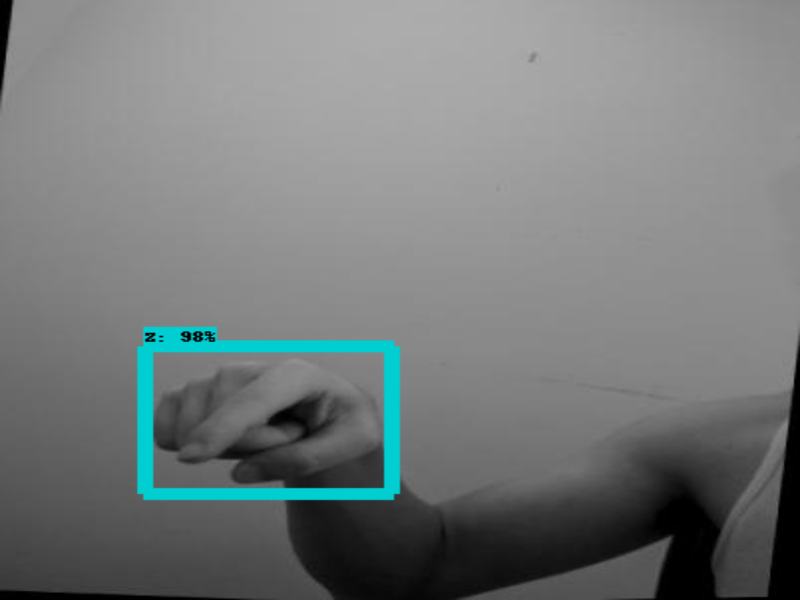

In [ ]:
img = '/content/Z29_jpg.rf.64a16f3aec369f9abc15186097a1a1a5.jpg'
predict(img)

In [ ]:
!pip freeze requirements.txt

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
apache-beam==2.28.0
appdirs==1.4.4
argon2-cffi==20.1.0
astor==0.8.1
astropy==4.2.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.3.0
audioread==2.1.9
autograd==1.3
avro-python3==1.10.2
Babel==2.9.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.3.0
blis==0.4.1
bokeh==2.3.1
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.2.1
catalogue==1.0.0
certifi==2020.12.5
cffi==1.14.5
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda101==7.4.0
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.22
daft==0.0.4
dask==2.12.0
dataclasses==0.6
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.1.1
dis